# Autos Data
      
## Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/ 
### Answer the following questions with the help of one or more visualizations per question
* (1) Are there certain combinations of make and body-styles that have high city-mpg? (3.5)
* (2) When looking at cars with the disel and gas fuel-types, do either of these fuel types have cars with high highway-mpg and high price? Approximately, which fuel-type has more cars in the of high highway-mpg and high price region? Among those cars what is the lowest num-of-cylinders value? (4)

## Note:
* (1) Normalize data if required
* (2) Missing values can be filled in with any technique you learnt in your Data Mining courses

## Question-1: 
Are there certain combinations of make and body-styles that have high city-mpg?


In [121]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

autos_data_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", sep=',', 
                  names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
                           'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
                           'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system',
                           'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
                           'price'])

autos_data_df = autos_data_df.replace(to_replace='?', value=0)
#autos_data_df.head(10)





In [122]:
city_mpg_make = pd.pivot_table(autos_data_df, values='city-mpg', index=['make','body-style']) # city-mpg range of cars - low to high
city_mpg_make




city-mpg
make          body-style            
alfa-romero   convertible  21.000000
              hatchback    19.000000
audi          hatchback    16.000000
              sedan        19.400000
              wagon        19.000000
bmw           sedan        19.375000
chevrolet     hatchback    42.500000
              sedan        38.000000
dodge         hatchback    28.400000
              sedan        28.666667
              wagon        24.000000
honda         hatchback    33.142857
              sedan        26.600000
              wagon        30.000000
isuzu         hatchback    24.000000
              sedan        33.333333
jaguar        sedan        14.333333
mazda         hatchback    23.700000
              sedan        28.571429
mercedes-benz convertible  16.000000
              hardtop      18.000000
              sedan        18.500000
              wagon        22.000000
mercury       hatchback    19.000000
mitsubishi    hatchback    25.333333
              sedan        24.000000
nissan        hardtop      31.000000
              hatchback    22.600000
              sedan        29.222222
              wagon        26.333333
peugot        sedan        22.714286
              wagon        22.000000
plymouth      hatchback    27.750000
              sedan        31.000000
              wagon        24.000000
porsche       convertible  17.000000
              hardtop      17.000000
              hatchback    18.000000
renault       hatchback    23.000000
              wagon        23.000000
saab          hatchback    20.333333
              sedan        20.333333
subaru        hatchback    27.666667
              sedan        26.800000
              wagon        24.750000
toyota        convertible  24.000000
              hardtop      24.000000
              hatchback    27.785714
              sedan        29.100000
              wagon        26.000000
volkswagen    convertible  24.000000
              hatchback    24.000000
              sedan        30.000000
              wagon        25.000000
volvo         sedan        21.125000
              wagon        21.333333

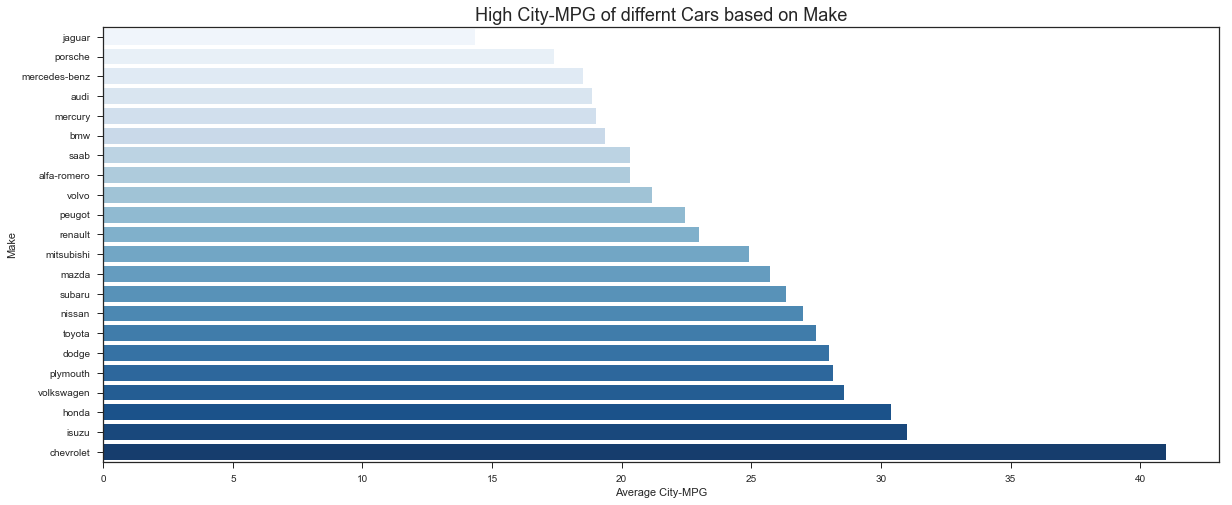

In [123]:
city_mpg_make = pd.pivot_table(autos_data_df, values='city-mpg', index='make', aggfunc=np.mean)
city_mpg_make = city_mpg_make.sort_values(by='city-mpg', ascending=True)
city_mpg_make = city_mpg_make.reset_index()
round(city_mpg_make,2)
plt.figure(figsize=(20,8))
sb.barplot(data=city_mpg_make, y='make', x='city-mpg', palette = 'Blues')
city_mpg_make = sb.set(font_scale = 1.5)
plt.title('High City-MPG of differnt Cars based on Make')
plt.xlabel('Average City-MPG')
plt.ylabel('Make')
plt.show()

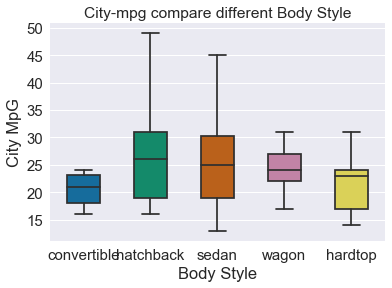

In [124]:
#City-MpG and different body style
body_city_mpg = sb.boxplot(x="body-style", y="city-mpg", width= 0.5,data=autos_data_df, palette='colorblind')
body_city_mpg = sb.set(font_scale=1.3)
body_city_mpg = figsize=(10,6)
plt.title('City-mpg compare different Body Style')
plt.xlabel('Body Style')
plt.ylabel('City MpG')
plt.show()


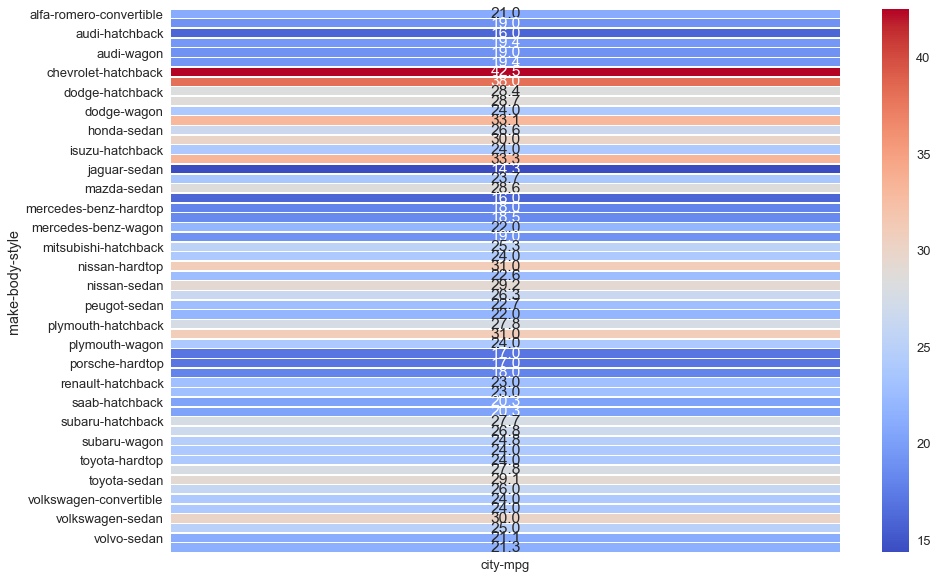

In [125]:
city_mpg_make = pd.pivot_table(autos_data_df, values='city-mpg', index=['make','body-style'])
city_mpg_make.sort_values(by='city-mpg', ascending=True)
#print(city_mpg_make)

fig, ax = plt.subplots(figsize=(15, 10))
sb.heatmap(round(city_mpg_make,2),annot=True, linewidths=.5,ax=ax, cmap="coolwarm",fmt='.1f')
plt.show()


## Question-1 Answer-1 :
From the above analysis we can say that, Yes, Chevrolet hatchback has the highest city mpg. Chevrolet has high city-mpg inside the city. If we see the Box plot for different types of Body-Style, we can see that Hatchback type has high city MpG. Moreover, Heatmap shows different make and body-style has different city Mpg and among them Chevrolet-Hatchback is the highest city-mpg.

## Question-2: 
When looking at cars with the disel and gas fuel-types, do either of these fuel types have cars with high highway-mpg and high price? 

Approximately, which fuel-type has more cars in the of high highway-mpg and high price region? 

Among those cars what is the lowest num-of-cylinders value?


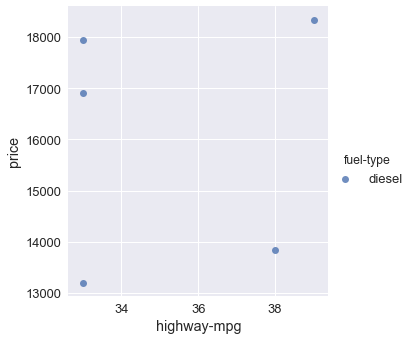

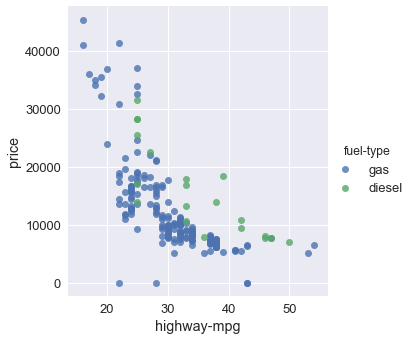

In [126]:
#Diesel cars have more quantity in highway-mpg and high price region
#converts into floats
autos_data_df['highway-mpg'] = autos_data_df['highway-mpg'].astype(float)
autos_data_df['price'] = autos_data_df['price'].astype(float)

#generate means for high_mpg and Price
mean_high_mpg = sum(autos_data_df['highway-mpg']) / len(autos_data_df['highway-mpg'])
mean_price = sum(autos_data_df['price']) / len(autos_data_df['price'])

#Extract data from autos_data_df where highway-mpg and price are greater than mean values
data = autos_data_df[(autos_data_df['highway-mpg'] > mean_high_mpg) & (autos_data_df['price'] > mean_price)]

sb.lmplot("highway-mpg", "price", data, hue="fuel-type",fit_reg=False)
sb.lmplot("highway-mpg", "price", autos_data_df, hue="fuel-type", fit_reg=False)

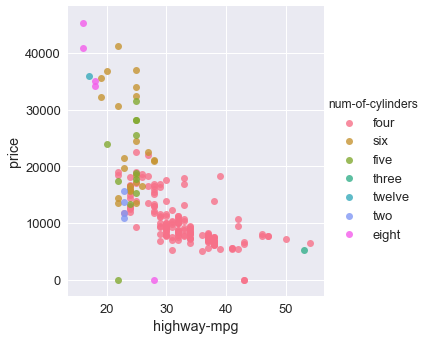

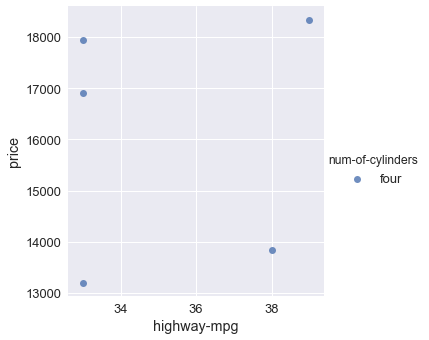

In [127]:
#Among above diesel cars lowest number of cylinders is Four.
sb.lmplot('highway-mpg',"price", autos_data_df, hue="num-of-cylinders", fit_reg=False)
sb.lmplot("highway-mpg", "price", data, hue="num-of-cylinders", fit_reg=False)

## Question-2 Answer-2:


From the avobe vizualization we can see that when price increases the highway mpg decreases.

If We compare the fuel type gas and diesel, We can see that diesel fuel type has more cars in the high highway-mpg and high
price region.

From the above charts we can see that the lowest number of cylinders value is 4.

